<a href="https://colab.research.google.com/github/prabhatbajpai/Breaking-Bad/blob/main/1_2_November_2020_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import glob as glob

In [ ]:
import warnings 
warnings.filterwarnings(action= 'ignore')

In [ ]:
df=pd.read_csv('./gdrive/My Drive/Deanonymization/WE_BC/WE_BC_November/WE_BC_Nov.csv')

In [ ]:
df=df.drop('hash',axis=1)
df=df.drop('time',axis=1)
df=df.drop('date',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9217935 entries, 0 to 9217934
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   balance           float64
 1   label             object 
 2   rec/sent          object 
 3   amount            float64
 4   block_id          int64  
 5   size              int64  
 6   weight            int64  
 7   version           int64  
 8   lock_time         int64  
 9   is_coinbase       int64  
 10  has_witness       int64  
 11  input_count       int64  
 12  output_count      int64  
 13  input_total       int64  
 14  input_total_usd   float64
 15  output_total      int64  
 16  output_total_usd  float64
 17  fee               int64  
 18  fee_usd           float64
 19  fee_per_kb        float64
 20  fee_per_kb_usd    float64
 21  fee_per_kwu       float64
 22  fee_per_kwu_usd   float64
 23  cdd_total         float64
dtypes: float64(10), int64(12), object(2)
memory usage: 1.6+ GB


In [ ]:
df["label"].replace({"Mining_pools":"Pool"}, inplace=True)

In [ ]:
df['label'].value_counts()

Exchange    89120
Services    15401
Pool        13453
Gambling     1069
Name: label, dtype: int64

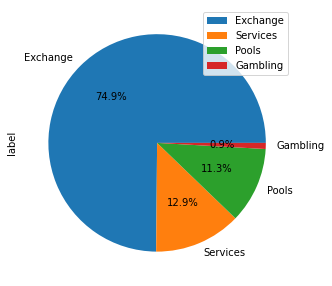

In [ ]:
pf2=pd.DataFrame({'label':[89120,15401,13453,1069]},
                index=['Exchange','Services' ,'Pools','Gambling'])
plt=pf2.plot.pie(y='label',autopct='%1.1f%%',figsize=(5,5))

In [ ]:
df=df.dropna()

In [ ]:
df.describe()

,balance,amount,block_id,size,weight,version,lock_time,is_coinbase,has_witness,input_count,output_count,input_total,input_total_usd,output_total,output_total_usd,fee,fee_usd,fee_per_kb,fee_per_kb_usd,fee_per_kwu,fee_per_kwu_usd,cdd_total
count,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,1.190430e+05,1.190430e+05,1.190430e+05,1.190430e+05,1.190430e+05,119043.000000,1.190430e+05,119043.000000,119043.000000,119043.000000,119043.000000
mean,1501.312784,0.349029,657408.713356,3015.092488,11402.909654,1.400133,170530.647867,0.000949,0.326882,7.867124,51.669355,1.285962e+09,2.181509e+05,1.286216e+09,2.181919e+05,4.122588e+05,68.137305,1.558535e+05,25.347849,41141.932393,6.685567,77.264274
std,873.155954,7.323618,1394.151426,6192.782917,22486.646121,0.489927,288075.840780,0.030795,0.469076,26.526833,133.224684,3.094149e+10,5.265374e+06,3.094146e+10,5.265369e+06,1.199388e+06,197.876443,1.334310e+05,21.257840,33522.815534,5.299702,4396.784019
min,0.000000,0.000005,654933.000000,188.000000,441.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,5.550000e+02,8.590000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,636.178475,0.002771,656201.000000,389.000000,1468.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.851178e+07,4.636134e+03,2.885986e+07,4.664957e+03,3.927100e+04,6.533550,4.463040e+04,7.857900,15542.550000,2.546550,0.029981
50%,1602.669028,0.012600,657565.000000,674.000000,2596.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,1.877360e+08,3.124937e+04,1.885779e+08,3.144597e+04,1.233940e+05,20.182700,9.493950e+04,17.177000,25081.800000,4.366800,0.477494
75%,2206.145551,0.062480,658700.000000,2274.000000,8014.000000,2.000000,654965.000000,0.000000,1.000000,2.000000,31.000000,7.370555e+08,1.233035e+05,7.368524e+08,1.232766e+05,2.269680e+05,36.516700,3.171650e+05,47.111100,79911.300000,11.874300,5.180922
max,2765.479750,1300.000000,659398.000000,178256.000000,525880.000000,2.000000,659395.000000,1.000000,1.000000,1009.000000,3963.000000,5.430189e+12,9.442097e+08,5.430188e+12,9.442096e+08,2.084067e+07,2871.341600,1.584640e+06,219.181000,465498.000000,64.386000,817073.693285


In [ ]:
# def label_coder():
#   for i in df['label']:
#     if i=='Exchange':
#       i=0
#     elif i=='Services':
#       i=1
#     elif i=='Pool':
#       i=2
#     else: i=3
# label_coder()
df["label"].replace({"Exchange": 0, "Services": 1,"Pool":2,"Gambling":3}, inplace=True)

In [ ]:
from sklearn import preprocessing
def peenc(df):
  label_encoder=preprocessing.LabelEncoder()
  #df['label']=label_encoder.fit_transform(df['label'])
  df['rec/sent']=label_encoder.fit_transform(df['rec/sent'])
peenc(df) 

In [ ]:
df['label'].value_counts()

0    89120
1    15401
2    13453
3     1069
Name: label, dtype: int64

In [ ]:
df=df.drop('balance',axis=1)

In [ ]:
def f1():
  X=df.drop('label',axis=1)
  y=df['label']
  #print(y.value_counts())
  return X,y
X,y=f1()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
def f2():
  X,y=f1()
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
  norm = MinMaxScaler().fit(X_train)
  X_train = norm.transform(X_train)
  X_test = norm.transform(X_test)
  sm = SMOTE(random_state = 2)
  X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  X_test_res,y_test_res=sm.fit_sample(X_test,y_test.ravel())
  return X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res
X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f2()
def f3():
  return X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res;

In [ ]:
X_test_res.shape

(89392, 22)

In [ ]:
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')

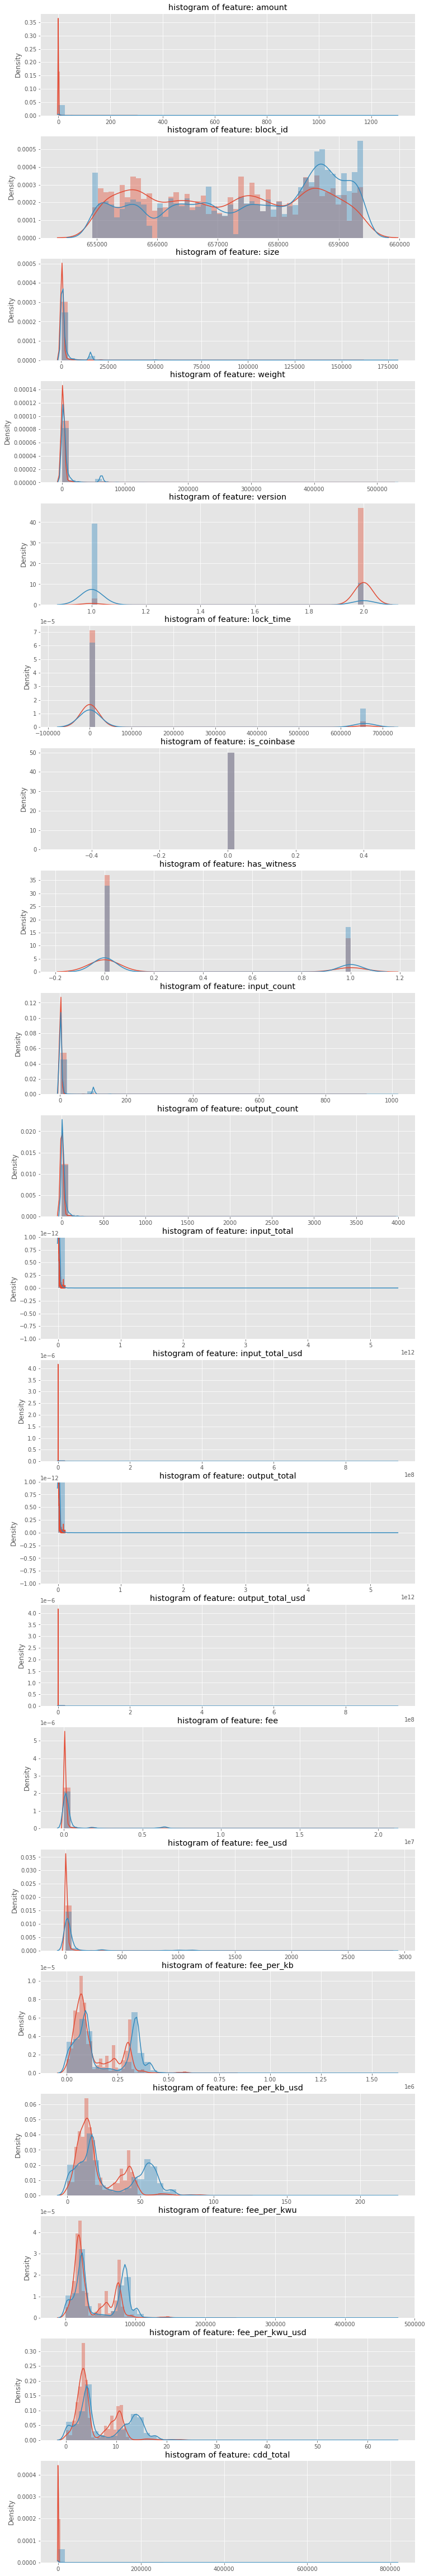

In [ ]:
# visual libraries
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


anomalous_features = df.iloc[:,2:25].columns

plt.figure(figsize=(12,24*4))
gs = gridspec.GridSpec(24, 1)
for i, cn in enumerate(df[anomalous_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.label == 1], bins=50)
    sns.distplot(df[cn][df.label == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

**Decision_Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
def cls1():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  dtc=DecisionTreeClassifier(criterion='entropy',max_depth=6)
  ovr=OneVsRestClassifier(dtc)
  ovr.fit(X_train,y_train)
  return ovr.predict_proba(X_test),y_test
pp,y_test=cls1()
fpr = {}
tpr = {}
thresh ={}
n_class = 4
X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pp[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Exchange vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Services vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Pools vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='brown', label='Gambling vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=600); 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
def DTC():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f2()
  dtc=DecisionTreeClassifier(criterion='entropy',max_depth=6)
  dtc.fit(X_train,y_train)
  dtc_y=dtc.predict(X_test);
  target_names = ['Exchange', 'Services', 'Pools','Gambling']
  print(classification_report(y_test,dtc_y,target_names=target_names))
  dtc_res=DecisionTreeClassifier(criterion='entropy',max_depth=6)
  dtc_res.fit(X_train_res,y_train_res)
  res_y=dtc_res.predict(X_test_res);
  print(classification_report(y_test_res,res_y,target_names=target_names))
  print("CV Accuracy")
  print(dtc.score(X_test,y_test))
  print("CV Accuracy after SMOTE")
  print(dtc_res.score(X_test_res,y_test_res))
DTC()

              precision    recall  f1-score   support

    Exchange       0.98      1.00      0.99     22288
    Services       0.99      0.88      0.93      3856
       Pools       1.00      1.00      1.00      3346
    Gambling       1.00      0.57      0.73       271

    accuracy                           0.98     29761
   macro avg       0.99      0.86      0.91     29761
weighted avg       0.98      0.98      0.98     29761

              precision    recall  f1-score   support

    Exchange       0.89      0.78      0.83     22288
    Services       0.97      0.88      0.92     22288
       Pools       1.00      1.00      1.00     22288
    Gambling       0.78      0.95      0.86     22288

    accuracy                           0.90     89152
   macro avg       0.91      0.90      0.90     89152
weighted avg       0.91      0.90      0.90     89152

CV Accuracy
0.9793689728167736
CV Accuracy after SMOTE
0.9010341888011486


**KNN**

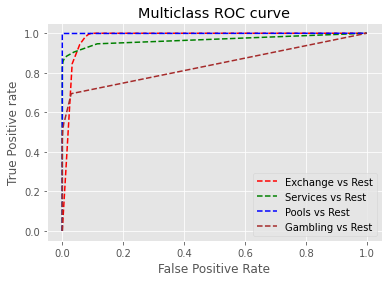

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
def cls1():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  dtc=KNeighborsClassifier(n_neighbors=10)
  ovr=OneVsRestClassifier(dtc)
  ovr.fit(X_train,y_train)
  return ovr.predict_proba(X_test),y_test
pp,y_test=cls1()
fpr = {}
tpr = {}
thresh ={}
n_class = 4
X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pp[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Exchange vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Services vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Pools vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='brown', label='Gambling vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=600); 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
def cls3():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  knn=KNeighborsClassifier(n_neighbors=10)
  knn.fit(X_train,y_train)
  knn_y=knn.predict(X_test);
  target_names = ['Exchange', 'Services', 'Pools','Gambling']
  print(classification_report(y_test,knn_y,target_names=target_names))
  knn_res=KNeighborsClassifier(n_neighbors=10)
  knn_res.fit(X_train_res,y_train_res)
  res_y=knn_res.predict(X_test_res);
  print(classification_report(y_test_res,res_y,target_names=target_names))
  print("CV Accuracy")
  print(knn.score(X_test,y_test))
  print("CV Accuracy after SMOTE")
  print(knn_res.score(X_test_res,y_test_res))
cls3()

              precision    recall  f1-score   support

    Exchange       0.97      1.00      0.98     22348
    Services       0.98      0.86      0.91      3819
       Pools       1.00      1.00      1.00      3316
    Gambling       0.96      0.46      0.62       278

    accuracy                           0.97     29761
   macro avg       0.98      0.83      0.88     29761
weighted avg       0.97      0.97      0.97     29761

              precision    recall  f1-score   support

    Exchange       0.76      0.93      0.84     22348
    Services       0.93      0.89      0.91     22348
       Pools       1.00      1.00      1.00     22348
    Gambling       0.92      0.76      0.83     22348

    accuracy                           0.89     89392
   macro avg       0.90      0.89      0.90     89392
weighted avg       0.90      0.89      0.90     89392

CV Accuracy
0.9747992338967104
CV Accuracy after SMOTE
0.894655002684804


**Random_Forest**

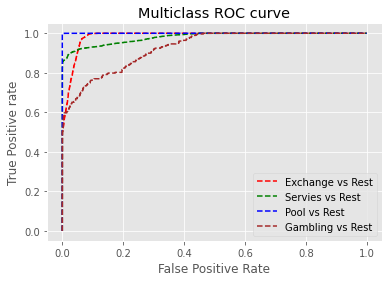

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
def cls1():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  rf=RandomForestClassifier(max_depth=5,random_state=0)
  ovr=OneVsRestClassifier(rf)
  ovr.fit(X_train,y_train)
  return ovr.predict_proba(X_test),y_test
pp,y_test=cls1()
fpr = {}
tpr = {}
thresh ={}
n_class = 4
X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pp[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Exchange vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Servies vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Pool vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='brown', label='Gambling vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=600); 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
def cls4():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  rf=RandomForestClassifier(max_depth=5,random_state=0)
  target_names = ['Exchange', 'Services', 'Pools','Gambling']
  rf.fit(X_train,y_train)
  rf_y=rf.predict(X_test)
  print(classification_report(y_test,rf_y,target_names=target_names))
  rfs=RandomForestClassifier(max_depth=5,random_state=0)
  rfs.fit(X_train_res,y_train_res)
  res_y=rfs.predict(X_test_res)
  print(classification_report(y_test_res,res_y,target_names=target_names))
  print(rf.score(X_test,y_test))
  print(rfs.score(X_test_res,y_test_res))
cls4()

              precision    recall  f1-score   support

    Exchange       0.96      1.00      0.98     22348
    Services       0.98      0.83      0.90      3819
       Pools       1.00      1.00      1.00      3316
    Gambling       0.00      0.00      0.00       278

    accuracy                           0.97     29761
   macro avg       0.73      0.71      0.72     29761
weighted avg       0.96      0.97      0.96     29761

              precision    recall  f1-score   support

    Exchange       0.74      0.84      0.79     22348
    Services       0.96      0.87      0.91     22348
       Pools       1.00      1.00      1.00     22348
    Gambling       0.81      0.78      0.79     22348

    accuracy                           0.87     89392
   macro avg       0.88      0.87      0.87     89392
weighted avg       0.88      0.87      0.87     89392

0.9686502469675078
0.8707266869518525


**Adaptive Boosting**

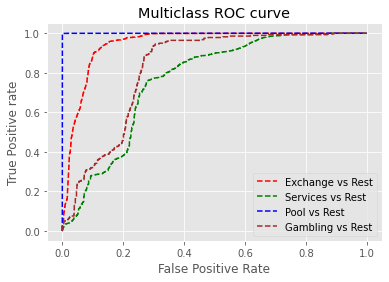

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
def cls1():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  ab=AdaBoostClassifier(n_estimators=100,random_state=0)
  ovr=OneVsRestClassifier(ab)
  ovr.fit(X_train,y_train)
  return ovr.predict_proba(X_test),y_test
pp,y_test=cls1()
fpr = {}
tpr = {}
thresh ={}
n_class = 4
X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pp[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Exchange vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Services vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Pool vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='brown', label='Gambling vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=600); 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
def cls5():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  ab=AdaBoostClassifier(n_estimators=100,random_state=0)
  target_names = ['Exchange', 'Services', 'Pools','Gambling']
  ab.fit(X_train,y_train)
  ab_y=ab.predict(X_test)
  print(classification_report(y_test,ab_y,target_names=target_names))
  abs=AdaBoostClassifier(n_estimators=100,random_state=0)
  abs.fit(X_train_res,y_train_res)
  abs_y=abs.predict(X_test_res)
  print(classification_report(y_test_res,abs_y,target_names=target_names))
  print(ab.score(X_test,y_test))
  print(abs.score(X_test_res,y_test_res))
cls5()

              precision    recall  f1-score   support

    Exchange       0.93      0.39      0.55     22348
    Services       0.20      0.87      0.32      3819
       Pools       0.99      0.99      0.99      3316
    Gambling       0.00      0.00      0.00       278

    accuracy                           0.52     29761
   macro avg       0.53      0.56      0.47     29761
weighted avg       0.84      0.52      0.57     29761

              precision    recall  f1-score   support

    Exchange       0.59      0.17      0.26     22348
    Services       0.54      0.87      0.67     22348
       Pools       1.00      0.99      0.99     22348
    Gambling       0.72      0.80      0.76     22348

    accuracy                           0.71     89392
   macro avg       0.71      0.71      0.67     89392
weighted avg       0.71      0.71      0.67     89392

0.5172541245253856
0.7075689099695722


**Gredient_Boosting**

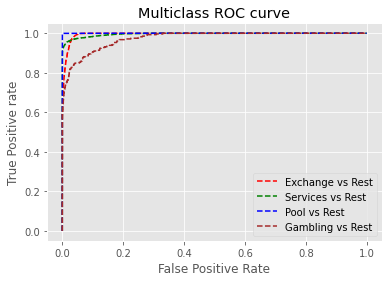

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
def cls1():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  gcb=gcb=GradientBoostingClassifier(n_estimators=100,max_depth=10,random_state=0)
  ovr=OneVsRestClassifier(gcb)
  ovr.fit(X_train,y_train)
  return ovr.predict_proba(X_test),y_test
pp,y_test=cls1()
fpr = {}
tpr = {}
thresh ={}
n_class = 4
X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pp[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Exchange vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Services vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Pool vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='brown', label='Gambling vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=1200); 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
def cls5():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
  gcb=GradientBoostingClassifier(n_estimators=100,max_depth=10,random_state=0)
  target_names = ['Exchange', 'Services', 'Pools','Gambling']
  gcb.fit(X_train,y_train)
  gcb_y=gcb.predict(X_test)
  print(classification_report(y_test,gcb_y,target_names=target_names))
  gcbs=GradientBoostingClassifier(n_estimators=100,max_depth=10,random_state=0)
  gcbs.fit(X_train_res,y_train_res)
  gcbs_y=gcbs.predict(X_test_res)
  print(classification_report(y_test_res,gcbs_y,target_names=target_names))
  print(gcb.score(X_test,y_test))
  print(gcbs.score(X_test_res,y_test_res))
cls5()

              precision    recall  f1-score   support

    Exchange       0.98      1.00      0.99     22348
    Services       0.99      0.92      0.95      3819
       Pools       1.00      1.00      1.00      3316
    Gambling       0.78      0.60      0.68       278

    accuracy                           0.98     29761
   macro avg       0.94      0.88      0.91     29761
weighted avg       0.98      0.98      0.98     29761

              precision    recall  f1-score   support

    Exchange       0.88      0.99      0.93     22348
    Services       0.94      0.95      0.95     22348
       Pools       1.00      1.00      1.00     22348
    Gambling       0.98      0.85      0.91     22348

    accuracy                           0.95     89392
   macro avg       0.95      0.95      0.95     89392
weighted avg       0.95      0.95      0.95     89392

0.9831658882430026
0.9470198675496688


**ANN**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model =keras.models.Sequential([
    layers.Dense(units=300,activation='relu',input_shape=[22]),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=29,activation ='softmax'),
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer="sgd",
             metrics=['accuracy'])

In [ ]:
X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
model_history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=750,epochs=45)

Epoch 1/45
120/120 [==============================] - 4s 27ms/step - loss: 2.8008 - accuracy: 0.5939 - val_loss: 1.1313 - val_accuracy: 0.7509
Epoch 2/45
120/120 [==============================] - 3s 22ms/step - loss: 1.0007 - accuracy: 0.7478 - val_loss: 0.6917 - val_accuracy: 0.7509
Epoch 3/45
120/120 [==============================] - 3s 22ms/step - loss: 0.6284 - accuracy: 0.7541 - val_loss: 0.4981 - val_accuracy: 0.8256
Epoch 4/45
120/120 [==============================] - 3s 23ms/step - loss: 0.4693 - accuracy: 0.8457 - val_loss: 0.4046 - val_accuracy: 0.9458
Epoch 5/45
120/120 [==============================] - 3s 22ms/step - loss: 0.3885 - accuracy: 0.9525 - val_loss: 0.3466 - val_accuracy: 0.9665
Epoch 6/45
120/120 [==============================] - 3s 22ms/step - loss: 0.3341 - accuracy: 0.9677 - val_loss: 0.3074 - val_accuracy: 0.9669
Epoch 7/45
120/120 [==============================] - 3s 23ms/step - loss: 0.2987 - accuracy: 0.9674 - val_loss: 0.2785 - val_accuracy: 0.9669

In [ ]:
model_history.history

{'accuracy': [0.706267774105072,
  0.7478775382041931,
  0.7663694620132446,
  0.8732443451881409,
  0.9593983292579651,
  0.9679218530654907,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144,
  0.967955470085144],
 'loss': [2.19012188911438,
  0.89056

In [ ]:
model.evaluate(X_test,y_test)

931/931 [==============================] - 1s 1ms/step - loss: 0.1479 - accuracy: 0.9669


[0.14787735044956207, 0.9669365882873535]

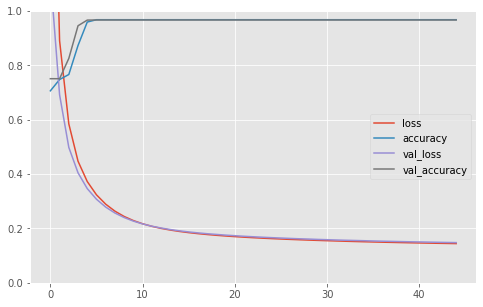

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model_smo =keras.models.Sequential([
    layers.Dense(units=300,activation='relu',input_shape=[22]),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=29,activation ='softmax'),
])

In [ ]:
model_smo.compile(loss='sparse_categorical_crossentropy',
             optimizer="sgd",
             metrics=['accuracy'])

In [ ]:
X_train,X_test,y_train,y_test,X_train_res,y_train_res,X_test_res,y_test_res=f3()
model_history=model_smo.fit(X_train_res,y_train_res,validation_data=(X_test_res,y_test_res),batch_size=750,epochs=45)

Epoch 1/45
357/357 [==============================] - 8s 23ms/step - loss: 2.3501 - accuracy: 0.5089 - val_loss: 0.9424 - val_accuracy: 0.7080
Epoch 2/45
357/357 [==============================] - 8s 22ms/step - loss: 0.8496 - accuracy: 0.7138 - val_loss: 0.7243 - val_accuracy: 0.7075
Epoch 3/45
357/357 [==============================] - 8s 22ms/step - loss: 0.6833 - accuracy: 0.7108 - val_loss: 0.6477 - val_accuracy: 0.7071
Epoch 4/45
357/357 [==============================] - 8s 22ms/step - loss: 0.6149 - accuracy: 0.7196 - val_loss: 0.5981 - val_accuracy: 0.7310
Epoch 5/45
357/357 [==============================] - 8s 22ms/step - loss: 0.5697 - accuracy: 0.7498 - val_loss: 0.5594 - val_accuracy: 0.7676
Epoch 6/45
357/357 [==============================] - 8s 22ms/step - loss: 0.5331 - accuracy: 0.7767 - val_loss: 0.5280 - val_accuracy: 0.7674
Epoch 7/45
357/357 [==============================] - 8s 23ms/step - loss: 0.5054 - accuracy: 0.7840 - val_loss: 0.5030 - val_accuracy: 0.7893

In [ ]:
model.evaluate(X_test_res,y_test_res)

2794/2794 [==============================] - 4s 1ms/step - loss: 1.2208 - accuracy: 0.7027


[1.2207751274108887, 0.70265793800354]

In [ ]:
model_history.history

{'accuracy': [0.6296538710594177,
  0.712559163570404,
  0.7127912640571594,
  0.7231549024581909,
  0.7622656226158142,
  0.7772082686424255,
  0.7887362837791443,
  0.8039559721946716,
  0.8150235414505005,
  0.8262894749641418,
  0.8384015560150146,
  0.8470054864883423,
  0.8501505255699158,
  0.8511351943016052,
  0.8511015176773071,
  0.8523183465003967,
  0.8537485599517822,
  0.8558602333068848,
  0.8573241829872131,
  0.858256459236145,
  0.859151303768158,
  0.8596492409706116,
  0.8600985407829285,
  0.8602258563041687,
  0.8605440855026245,
  0.8608248829841614,
  0.8611169457435608,
  0.8612891435623169,
  0.8613378405570984,
  0.8614164590835571,
  0.8615699410438538,
  0.8614988327026367,
  0.8617571592330933,
  0.862041711807251,
  0.8623712062835693,
  0.8624798059463501,
  0.8625696301460266,
  0.8627194166183472,
  0.8629066348075867,
  0.8631237745285034,
  0.8632585406303406,
  0.8631948828697205,
  0.8632547855377197,
  0.8634270429611206,
  0.8633633852005005],
 

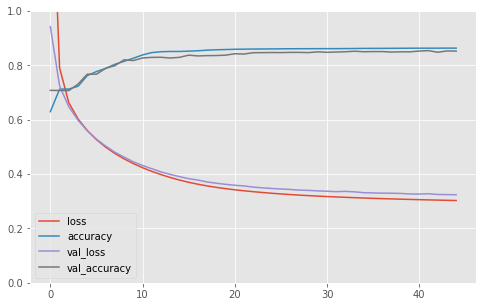

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()